# STAT1005 Project 4.7

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import statsmodels.formula.api as sm

# Data Processing

## EU Data

In [2]:
# import csv
eu_data = pd.read_csv('./data/eu_data.csv')

# drop unuse data 
eu_data.drop(columns=['country_code', 'source', 'new_cases', 'number_sequenced', 'percent_cases_sequenced', 'valid_denominator', 'number_sequenced_known_variant', 'percent_variant'], inplace=True)

#variant of interest
voi = ["B.1.1.7", "B.1.351", "P.1", "B.1.617.2"]
# voi = [alpha, beta, gamma, delta]

eu_data = eu_data[eu_data.variant.isin(voi) == True]
eu_data.dropna(subset = ['number_detections_variant'], inplace=True)
eu_data.reset_index(drop=True, inplace=True)
eu_data

,country,year_week,variant,number_detections_variant
0,Austria,2020-40,B.1.1.7,0.0
1,Belgium,2020-40,B.1.1.7,0.0
2,Bulgaria,2020-40,B.1.1.7,0.0
3,Croatia,2020-40,B.1.1.7,0.0
4,Cyprus,2020-40,B.1.1.7,0.0
...,...,...,...,...
9249,Romania,2021-40,P.1,0.0
9250,Slovakia,2021-40,P.1,0.0
9251,Slovenia,2021-40,P.1,0.0
9252,Spain,2021-40,P.1,0.0


In [3]:
eu_data_alpha = eu_data[eu_data.variant == "B.1.1.7"]
eu_data_beta = eu_data[eu_data.variant == "B.1.351"]
eu_data_gamma = eu_data[eu_data.variant == "P.1"]
eu_data_delta = eu_data[eu_data.variant == "B.1.617.2"]

## World Data

In [4]:
# Variant of interest
voi = ["Alpha", "Beta", "Gamma", "Delta"]

world_data = pd.read_csv('./data/world_data.csv')
world_data.drop(columns=['num_sequences_total', 'perc_sequences'], inplace=True)
world_data.dropna(subset=['num_sequences'], inplace=True)
world_data = world_data[world_data.variant.isin(voi) == True]
world_data.reset_index(drop=True, inplace=True)
world_data

,location,date,variant,num_sequences
0,Argentina,11/5/2020,Beta,0.0
1,Argentina,11/5/2020,Alpha,0.0
2,Argentina,11/5/2020,Gamma,0.0
3,Argentina,11/5/2020,Delta,0.0
4,Australia,11/5/2020,Beta,0.0
...,...,...,...,...
7067,United States,4/10/2021,Delta,11534.0
7068,Italy,10/10/2021,Beta,0.0
7069,Italy,10/10/2021,Alpha,0.0
7070,Italy,10/10/2021,Gamma,0.0


In [5]:
world_data_alpha = world_data[world_data.variant == "Alpha"]
world_data_beta = world_data[world_data.variant == "Beta"]
world_data_gamma = world_data[world_data.variant == "Gamma"]
world_data_delta = world_data[world_data.variant == "Delta"]

# Analysis

## EU Data

### Graph EU Cases

In [6]:
def data_clean(data, country):
    data_processed = data.copy()
    data_processed = data_processed[data_processed.country == country].sort_values(by = ['number_detections_variant'], ascending=False)
    data_processed = data_processed.drop_duplicates(subset = ["year_week"]).sort_index()
    data_processed = data_processed.set_index('year_week')
    return data_processed

def plot_graph(country, label):
    plt.plot(country.index, country.number_detections_variant, label=label)

In [7]:
country_eu = eu_data.copy()
country_eu = country_eu.drop(columns=['variant', 'number_detections_variant', 'year_week'])
country_eu = country_eu.drop_duplicates(subset = ['country'])
country_eu.reset_index(drop=True, inplace=True)

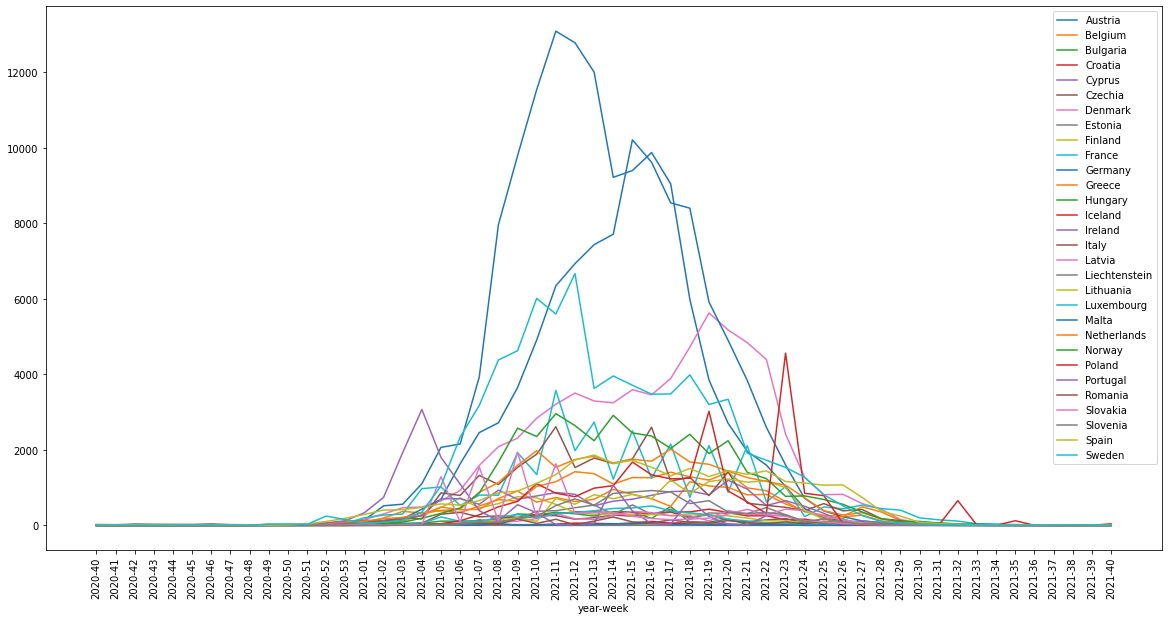

In [8]:
plt.figure(figsize=(20, 10))
plt.xticks(rotation=90)
plt.xlabel("year-week")
for i in country_eu['country']:
    plot_graph(data_clean(eu_data_alpha, i), i)
plt.legend()

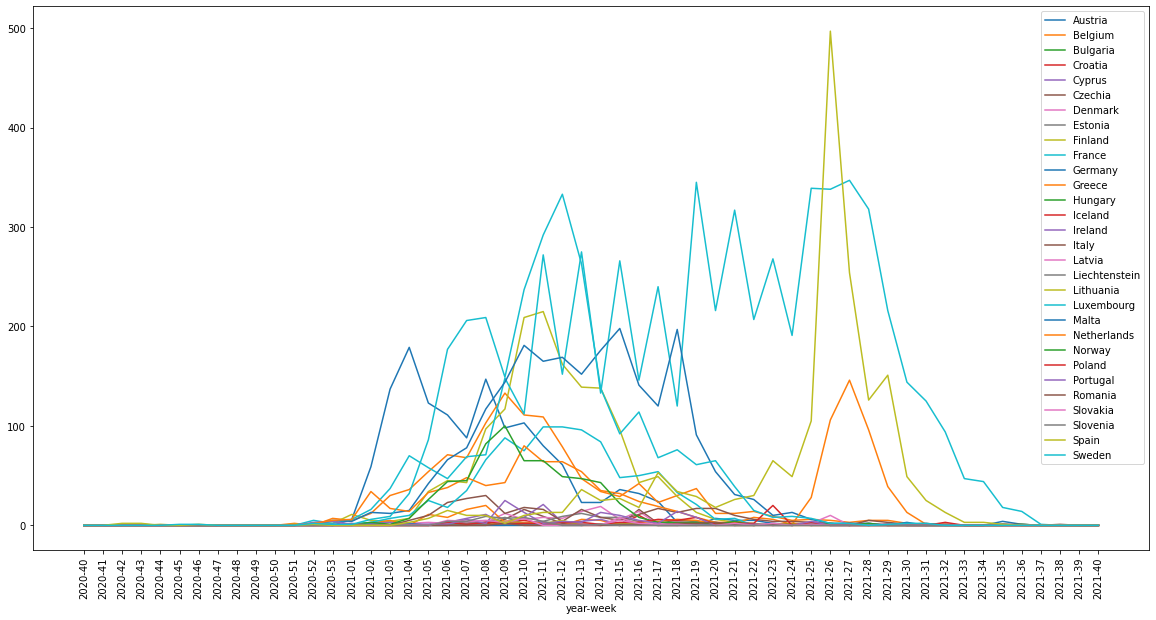

In [9]:
plt.figure(figsize=(20, 10))
plt.xticks(rotation=90)
plt.xlabel("year-week")
for i in country_eu['country']:
    plot_graph(data_clean(eu_data_beta, i), i)
plt.legend()

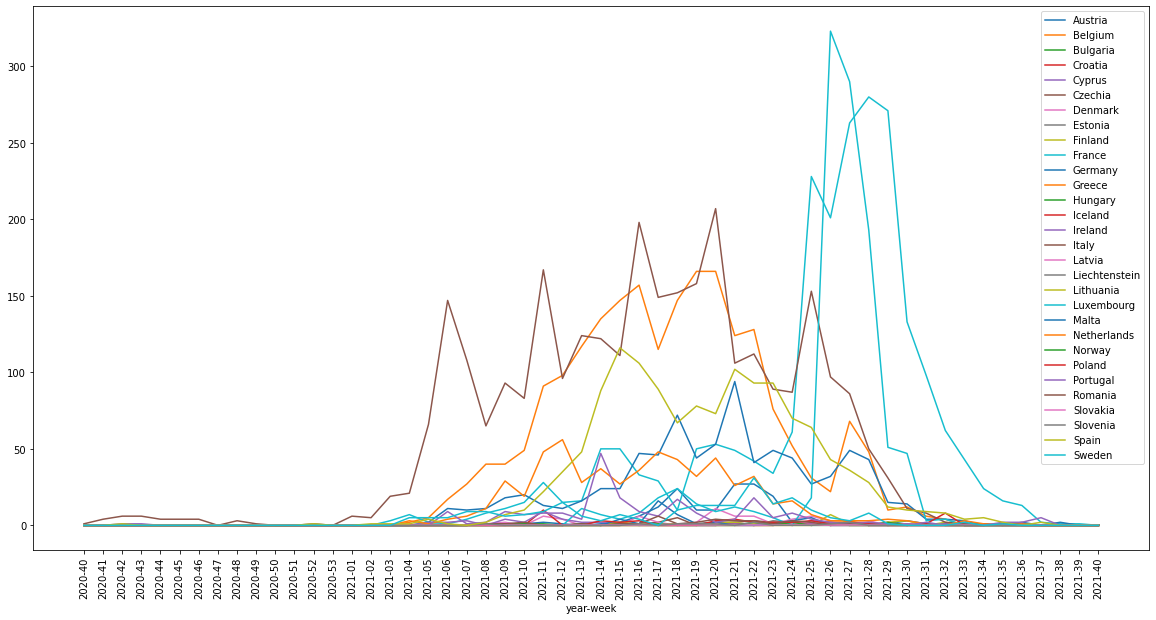

In [10]:
plt.figure(figsize=(20, 10))
plt.xticks(rotation=90)
plt.xlabel("year-week")
for i in country_eu['country']:
    plot_graph(data_clean(eu_data_gamma, i), i)
plt.legend()

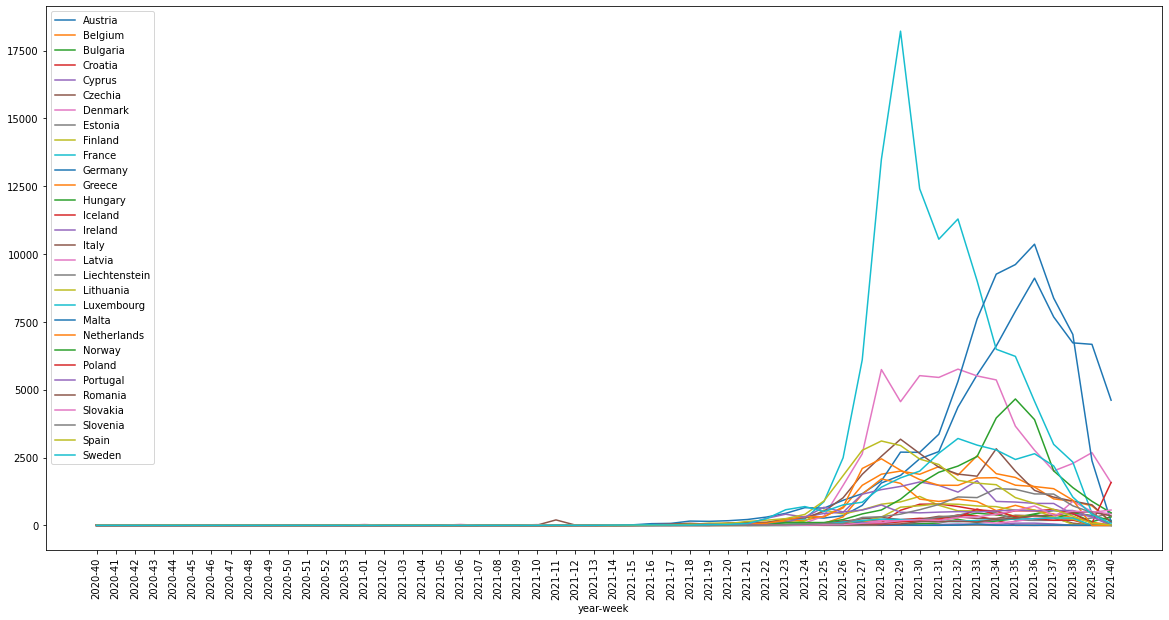

In [11]:
plt.figure(figsize=(20, 10))
plt.xticks(rotation=90)
plt.xlabel("year-week")
for i in country_eu['country']:
    plot_graph(data_clean(eu_data_delta, i), i)
plt.legend()

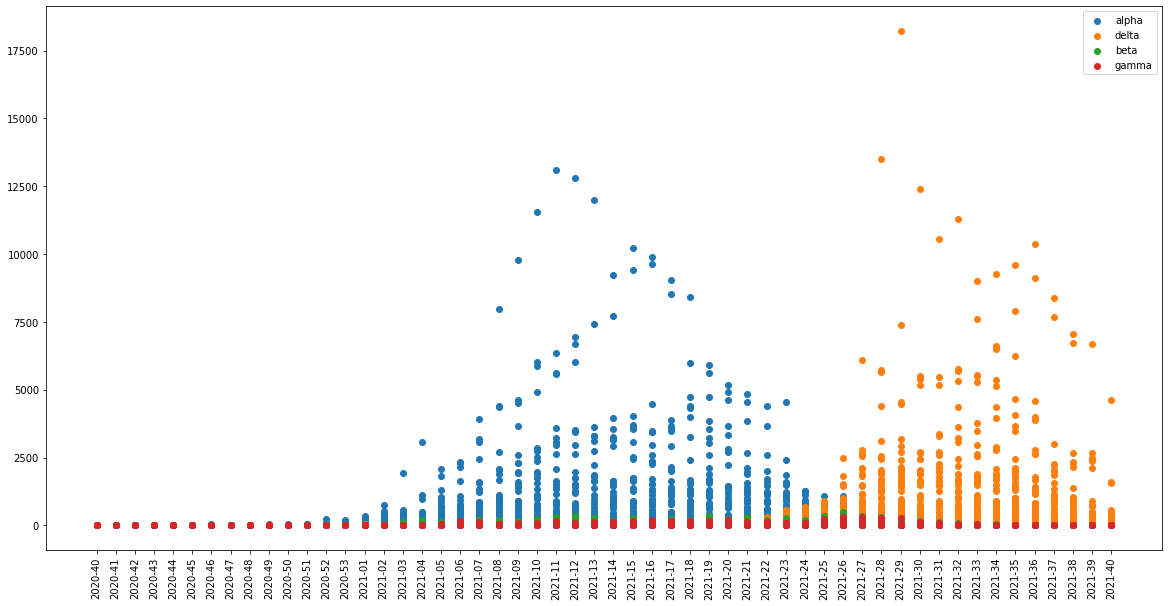

In [12]:
plt.figure(figsize=(20, 10))
plt.xticks(rotation=90)
plt.scatter(eu_data_alpha.year_week, eu_data_alpha.number_detections_variant, label="alpha")
plt.scatter(eu_data_delta.year_week, eu_data_delta.number_detections_variant, label="delta")
plt.scatter(eu_data_beta.year_week, eu_data_beta.number_detections_variant, label="beta")
plt.scatter(eu_data_gamma.year_week, eu_data_gamma.number_detections_variant, label="gamma")
plt.legend()

### Graph Observation Analysis

From the graph of each variant, it is possible to observed that the raise and drop in cases for a certain variant is happened mostly at the same timeframe throughout Europe. At the same time we can also observed that after the drop in cases, the variant is mostly no where to be found and replaced by another diverent variant.

While for the scattered graph, we can observed that the the alpha COVID-19 mutaion is the dominant strain in Europe before the number of cases drop and replaced by the delta variant.

___Thus, from all the graph we can obtain that the pattern, location, and spreading of diferent variant is simmilar accross Europe.___

### EU Regression and Correlation 

In [13]:
week = eu_data.copy()
week = week.drop(columns=['variant', 'number_detections_variant', 'country'])
week = week.drop_duplicates(subset = ['year_week'])
week.reset_index(drop=True, inplace=True)

In [14]:
def ols_location_time(data):
    eu_data_var = data.copy()

    for i in range(len(week)):
        eu_data_var.replace(to_replace = week['year_week'][i], value = (i + 1), inplace= True)

    result = sm.ols(formula="number_detections_variant ~ country + year_week", data=eu_data_var).fit()
    print(result.summary())
    
    for i in range(len(country_eu['country'])):
        eu_data_var.replace(to_replace = str(country_eu['country'][i]), value = (i + 1), inplace= True)
    sns.heatmap(eu_data_var.corr(), vmin=-1, vmax=1, annot=True, cbar=False).set_title("Correlation Analysis", fontdict={'fontsize':12}, pad=12);

                                OLS Regression Results                               
Dep. Variable:     number_detections_variant   R-squared:                       0.094
Model:                                   OLS   Adj. R-squared:                  0.091
Method:                        Least Squares   F-statistic:                     31.79
Date:                       Tue, 23 Nov 2021   Prob (F-statistic):          8.33e-172
Time:                               16:11:34   Log-Likelihood:                -75057.
No. Observations:                       9254   AIC:                         1.502e+05
Df Residuals:                           9223   BIC:                         1.504e+05
Df Model:                                 30                                         
Covariance Type:                   nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------

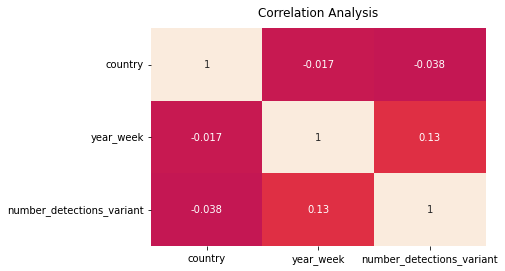

In [15]:
ols_location_time(eu_data)

                                OLS Regression Results                               
Dep. Variable:     number_detections_variant   R-squared:                       0.197
Model:                                   OLS   Adj. R-squared:                  0.188
Method:                        Least Squares   F-statistic:                     21.21
Date:                       Tue, 23 Nov 2021   Prob (F-statistic):          1.81e-101
Time:                               16:11:34   Log-Likelihood:                -21821.
No. Observations:                       2626   AIC:                         4.370e+04
Df Residuals:                           2595   BIC:                         4.389e+04
Df Model:                                 30                                         
Covariance Type:                   nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------

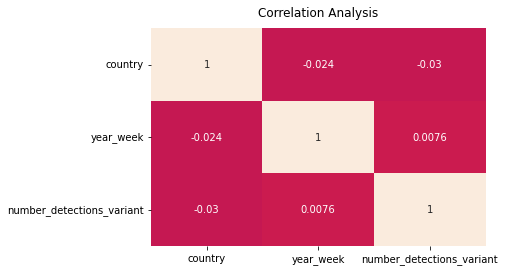

In [16]:
ols_location_time(eu_data_alpha)

                                OLS Regression Results                               
Dep. Variable:     number_detections_variant   R-squared:                       0.244
Model:                                   OLS   Adj. R-squared:                  0.233
Method:                        Least Squares   F-statistic:                     23.09
Date:                       Tue, 23 Nov 2021   Prob (F-statistic):          4.05e-108
Time:                               16:11:34   Log-Likelihood:                -10951.
No. Observations:                       2181   AIC:                         2.196e+04
Df Residuals:                           2150   BIC:                         2.214e+04
Df Model:                                 30                                         
Covariance Type:                   nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------

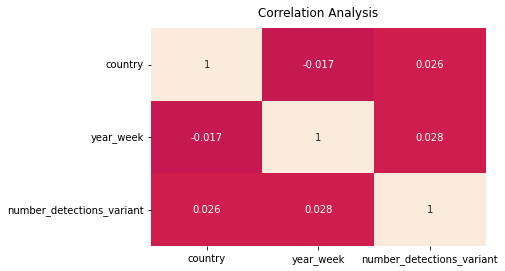

In [17]:
ols_location_time(eu_data_beta)

                                OLS Regression Results                               
Dep. Variable:     number_detections_variant   R-squared:                       0.268
Model:                                   OLS   Adj. R-squared:                  0.258
Method:                        Least Squares   F-statistic:                     25.52
Date:                       Tue, 23 Nov 2021   Prob (F-statistic):          6.00e-119
Time:                               16:11:35   Log-Likelihood:                -9805.2
No. Observations:                       2117   AIC:                         1.967e+04
Df Residuals:                           2086   BIC:                         1.985e+04
Df Model:                                 30                                         
Covariance Type:                   nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------

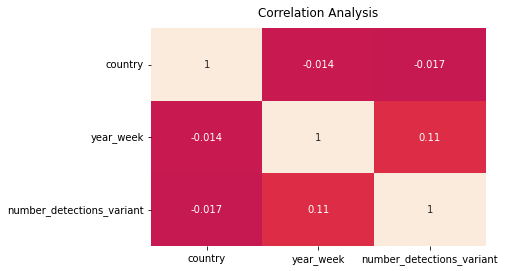

In [18]:
ols_location_time(eu_data_gamma)

                                OLS Regression Results                               
Dep. Variable:     number_detections_variant   R-squared:                       0.260
Model:                                   OLS   Adj. R-squared:                  0.251
Method:                        Least Squares   F-statistic:                     26.98
Date:                       Tue, 23 Nov 2021   Prob (F-statistic):          1.65e-127
Time:                               16:11:35   Log-Likelihood:                -19393.
No. Observations:                       2330   AIC:                         3.885e+04
Df Residuals:                           2299   BIC:                         3.903e+04
Df Model:                                 30                                         
Covariance Type:                   nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------

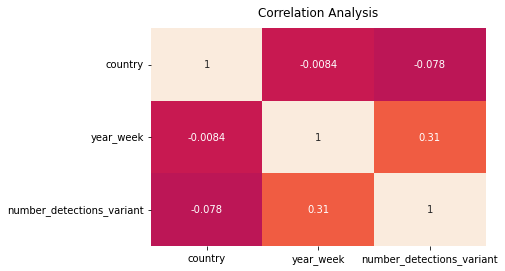

In [19]:
ols_location_time(eu_data_delta)

#### Overal Analysis For the Whole EU data

**OLS Regression**

With most p<0.05 and p=0 in most cases, it had shown a strong effidence that the location(country) and time(year_week) is effect the spread of a certain variant and overal(all variant data combined). Some test that result p>0.05 have tvalue that close to 0, indicating there might be lack of sample to have a simillar result like the other.

**Correlation Analysis**

Based on this analysis it is further strengthen the fact that the time frame matter and shown on the eu_data_delta and eu_data heatmap. Therefore, we need to make further correlation analysis and seperate the data based on certain the timeframe.

In [20]:
def corr_eu(data):
    eu_data_var = data.copy()

    for i in range(len(week)):
        eu_data_var.replace(to_replace = week['year_week'][i], value = (i + 1), inplace= True)
        
    for i in range(len(country_eu['country'])):
        eu_data_var.replace(to_replace = country_eu['country'][i], value = (i + 1), inplace= True)
    
    fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (25,6))
    sns.heatmap(eu_data_var.loc[(eu_data_var['year_week'] >= 1) & (eu_data_var['year_week'] <= 18)].corr(), vmin=-1, vmax=1, annot=True, ax = axs[0], cbar=False).set_title("Week 1 to 18", fontdict={'fontsize':20}, pad=12);
    sns.heatmap(eu_data_var.loc[(eu_data_var['year_week'] >= 19) & (eu_data_var['year_week'] <= 36)].corr(), vmin=-1, vmax=1, annot=True, ax = axs[1], cbar=False).set_title("Week 19 to 36", fontdict={'fontsize':20}, pad=12);
    sns.heatmap(eu_data_var.loc[(eu_data_var['year_week'] >= 37) & (eu_data_var['year_week'] <= 54)].corr(), vmin=-1, vmax=1, annot=True, ax = axs[2], cbar=False).set_title("Week 37 to 54", fontdict={'fontsize':20}, pad=12);

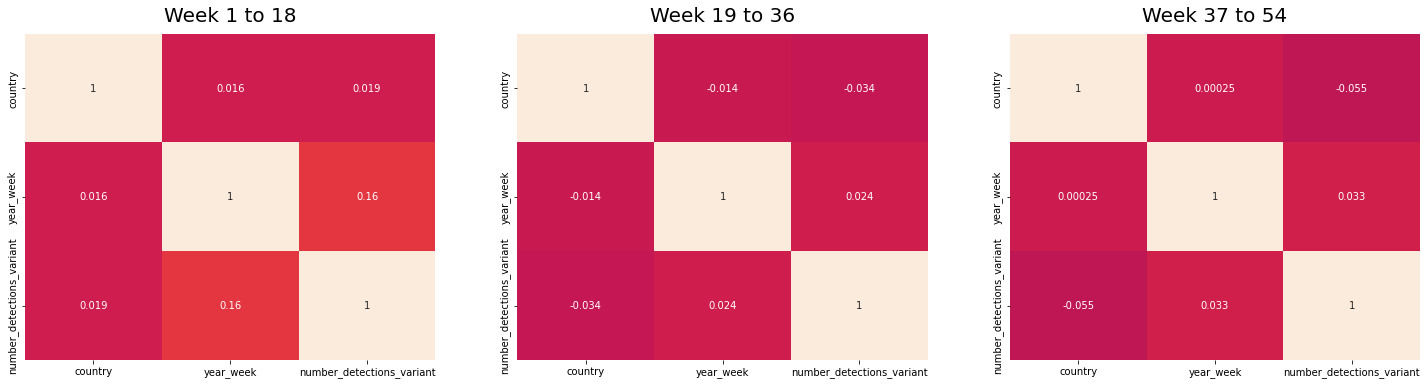

In [21]:
corr_eu(eu_data)

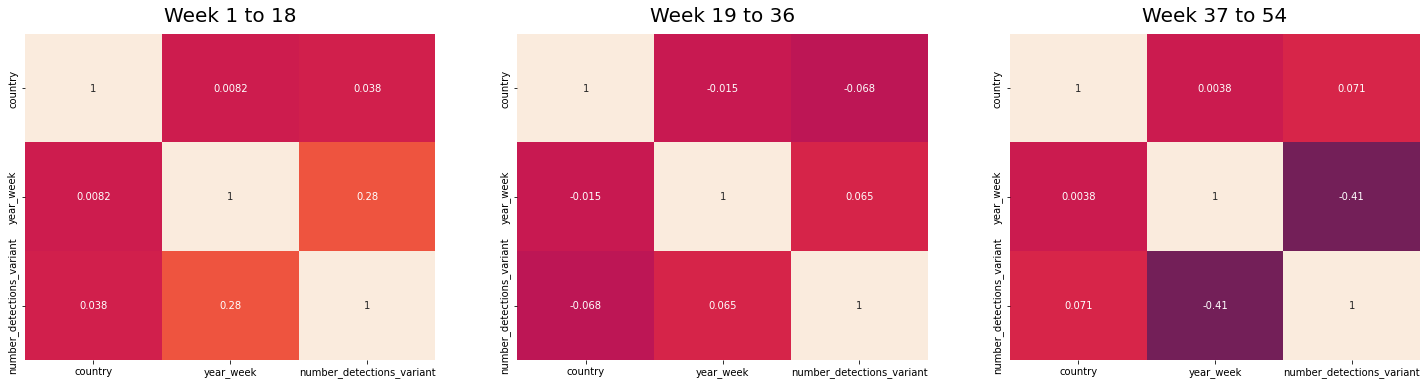

In [22]:
corr_eu(eu_data_alpha)

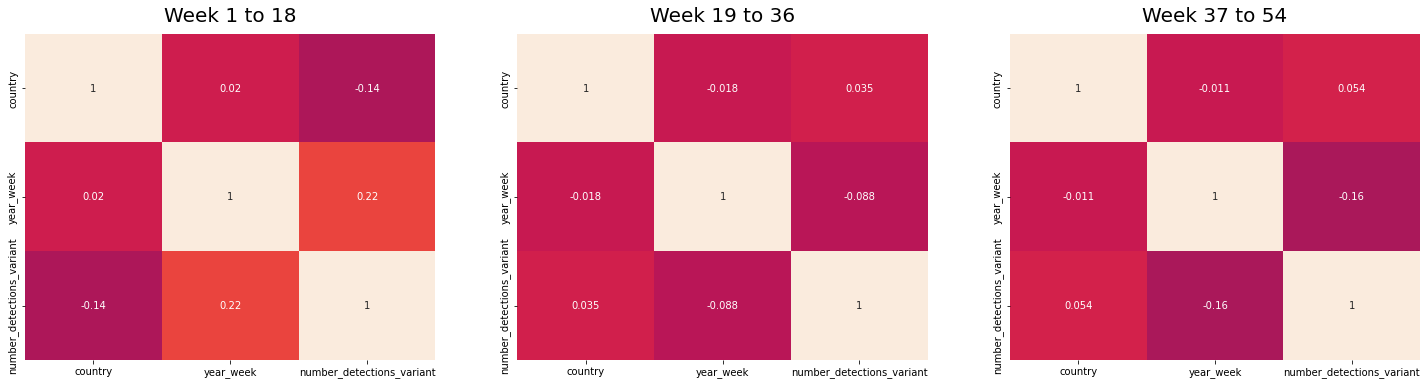

In [23]:
corr_eu(eu_data_beta)

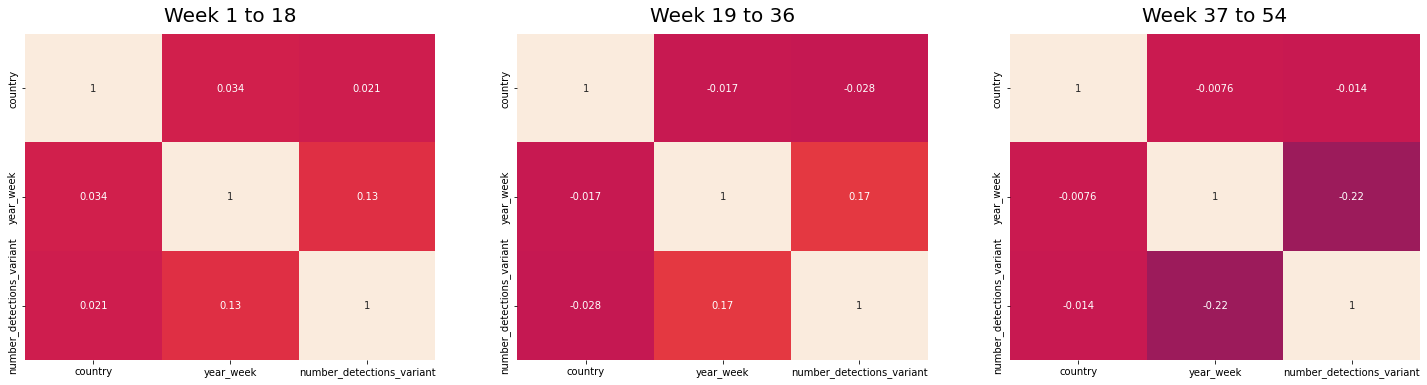

In [24]:
corr_eu(eu_data_gamma)

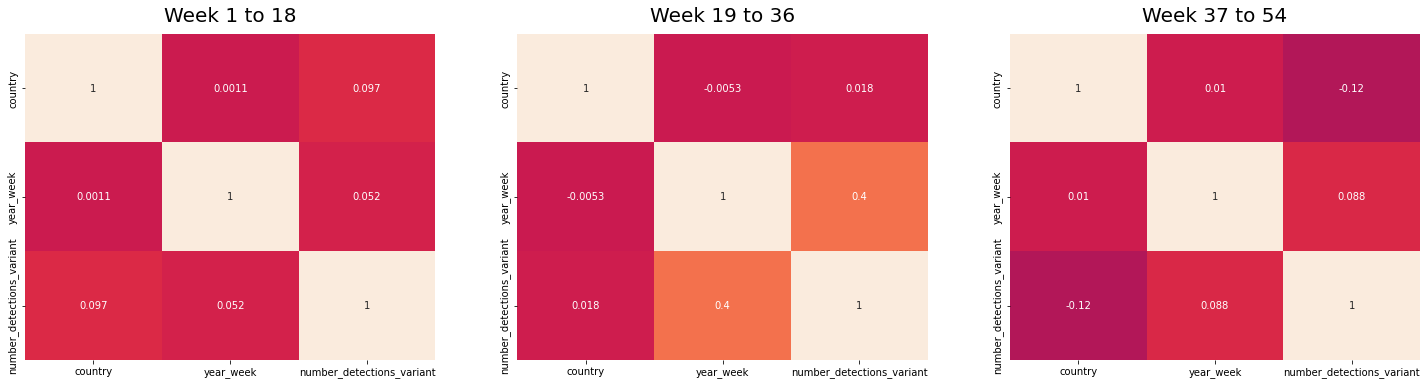

In [25]:
corr_eu(eu_data_delta)

#### Overal Analysis For EU data Heatmap

After observing the heatmap, noticed that there is a pattern that apply to all COVID-19 variant of concern. 

Observed That the year_week to num_detections_variant correlation is higher when the variant is about to raise and after the outbreak. While the country to num_detections_variant correlation coefficient is highest during the outbreak.

Indicating a relation between time with number of cases before and after the outbreak. While the location(country) is related to number of cases during the outbreak. 

Further strengthening the fact that **the outbreak of each variant mostly happened at different location during the same period of time with the same pattern of spreading.**

## World Data

### World Data Graph

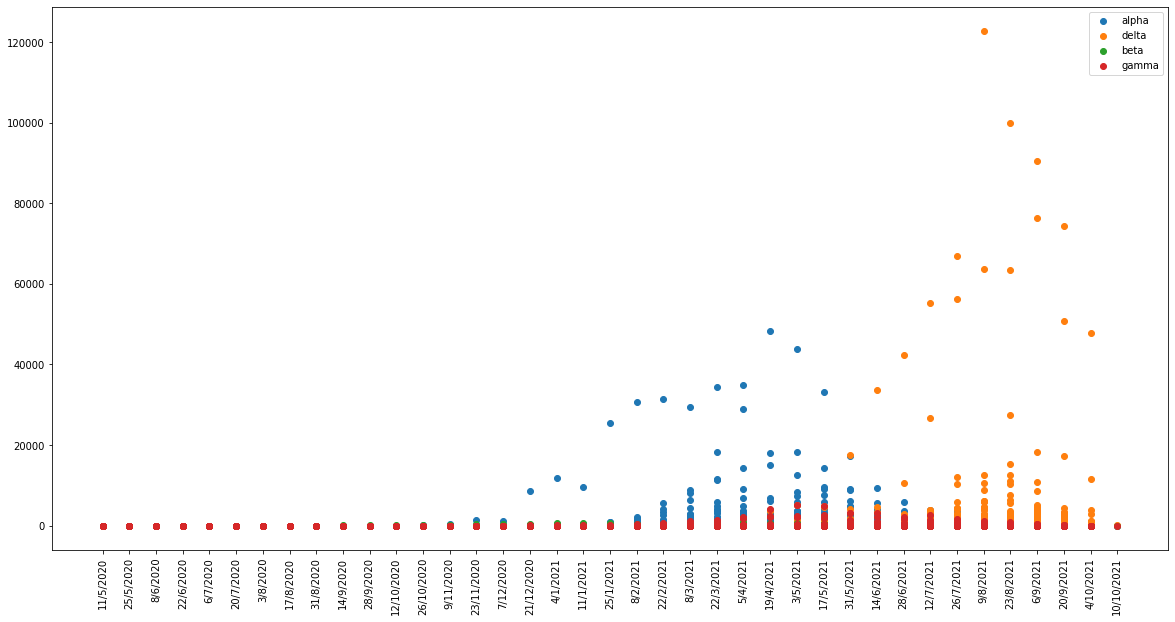

In [26]:
plt.figure(figsize=(20, 10))
plt.xticks(rotation=90)
plt.scatter(world_data_alpha.date, world_data_alpha.num_sequences, label="alpha")
plt.scatter(world_data_delta.date, world_data_delta.num_sequences, label="delta")
plt.scatter(world_data_beta.date, world_data_beta.num_sequences, label="beta")
plt.scatter(world_data_gamma.date, world_data_gamma.num_sequences, label="gamma")
plt.legend()

By observing the graph, it is also simillar to the Europe data that each COVID-19 mutation spread acrcross different location on the same time frame.

### World Data Regression and Correlation 

In [27]:
week = world_data.copy()
week = week.drop(columns=['variant', 'num_sequences', 'location'])
week = week.drop_duplicates(subset = ['date'])
week.reset_index(drop=True, inplace=True)

In [28]:
location_world = world_data.copy()
location_world = location_world.drop(columns=['variant', 'num_sequences', 'date'])
location_world = location_world.drop_duplicates(subset = ['location'])
location_world.reset_index(drop=True, inplace=True)

In [29]:
def ols_world(data):
    world_data_var = data.copy()

    for i in range(len(week)):
        world_data_var.replace(to_replace = week['date'][i], value = (i + 1), inplace= True)
        
    result = sm.ols(formula="num_sequences ~ location + date", data=world_data_var).fit()
    print(result.summary())
    
    print("\nCorrelation Analysis")
    for i in range(len(location_world['location'])):
        world_data_var.replace(to_replace = location_world['location'][i], value = (i + 1), inplace= True)
    sns.heatmap(world_data_var.corr(), vmin=-1, vmax=1, annot=True, cmap="Blues_r", cbar=False).set_title("Correlation Analysis", fontdict={'fontsize':12}, pad=12);
    

                            OLS Regression Results                            
Dep. Variable:          num_sequences   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     6.958
Date:                Tue, 23 Nov 2021   Prob (F-statistic):           2.02e-89
Time:                        16:11:36   Log-Likelihood:                -67610.
No. Observations:                7072   AIC:                         1.354e+05
Df Residuals:                    6965   BIC:                         1.362e+05
Df Model:                         106                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

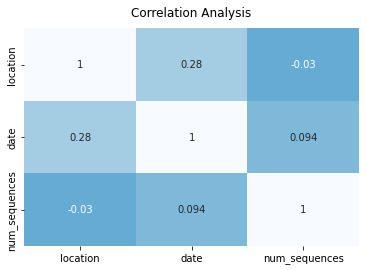

In [30]:
ols_world(world_data)

                            OLS Regression Results                            
Dep. Variable:          num_sequences   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     4.899
Date:                Tue, 23 Nov 2021   Prob (F-statistic):           1.06e-45
Time:                        16:11:36   Log-Likelihood:                -17642.
No. Observations:                1902   AIC:                         3.549e+04
Df Residuals:                    1799   BIC:                         3.606e+04
Df Model:                         102                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

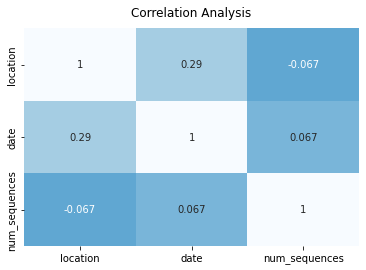

In [31]:
ols_world(world_data_alpha)

                            OLS Regression Results                            
Dep. Variable:          num_sequences   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     8.129
Date:                Tue, 23 Nov 2021   Prob (F-statistic):           1.52e-76
Time:                        16:11:37   Log-Likelihood:                -9896.7
No. Observations:                1783   AIC:                         1.996e+04
Df Residuals:                    1698   BIC:                         2.043e+04
Df Model:                          84                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

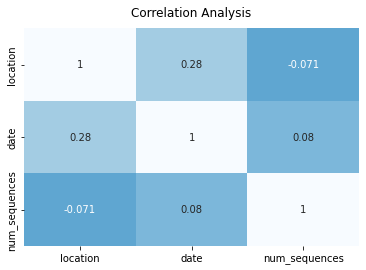

In [32]:
ols_world(world_data_beta)

                            OLS Regression Results                            
Dep. Variable:          num_sequences   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     7.860
Date:                Tue, 23 Nov 2021   Prob (F-statistic):           9.93e-57
Time:                        16:11:37   Log-Likelihood:                -10509.
No. Observations:                1481   AIC:                         2.115e+04
Df Residuals:                    1417   BIC:                         2.149e+04
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

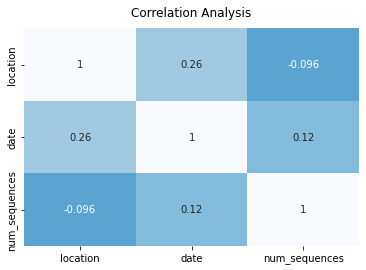

In [33]:
ols_world(world_data_gamma)

                            OLS Regression Results                            
Dep. Variable:          num_sequences   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                     4.890
Date:                Tue, 23 Nov 2021   Prob (F-statistic):           1.37e-45
Time:                        16:11:37   Log-Likelihood:                -19137.
No. Observations:                1906   AIC:                         3.848e+04
Df Residuals:                    1803   BIC:                         3.905e+04
Df Model:                         102                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

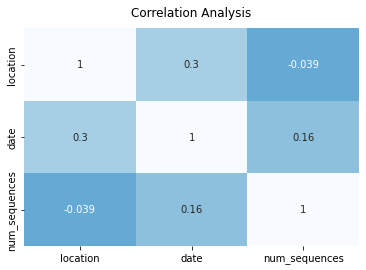

In [34]:
ols_world(world_data_delta)

#### OLS Regression Analysis
From this analysis observed that most of the p>0.05 and tvalue close to 0. This might be due to the fact that some country do not have sufficient sample to do the analysis. If we observe each variant regression result, we can be sure that spreading on some location have simillar transmission pattern like the Europe for all COVID-19 Variant of Concern and the date of time is also matter since all of them have p < 0.05 and -1 < t or t > 1. 

If we observed closer, some country give more sample on certain variant, thus strengthening the fact that during an outbreak, the location is related to number of cases.

#### Correlation Analysis
Based on this analysis it is further strengthen the fact that the time frame matter and shown on the world_data_delta, gamma, and world_data heatmap. Therefore, we need to make further correlation analysis and seperate the data based on certain the timeframe.

In [35]:
def corr_world(data):
    world_data_var = data.copy()

    for i in range(len(week)):
        world_data_var.replace(to_replace = week['date'][i], value = (i + 1), inplace= True)
    
    for i in range(len(location_world['location'])):
        world_data_var.replace(to_replace = location_world['location'][i], value = (i + 1), inplace= True)
        
    fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (25,6))
    sns.heatmap(world_data_var.loc[(world_data_var['date'] >= 1) & (world_data_var['date'] <= 13)].corr(), vmin=-1, vmax=1, annot=True, ax = axs[0], cbar=False).set_title("Week 1 to 13", fontdict={'fontsize':20}, pad=12);
    sns.heatmap(world_data_var.loc[(world_data_var['date'] >= 14) & (world_data_var['date'] <= 27)].corr(), vmin=-1, vmax=1, annot=True, ax = axs[1], cbar=False).set_title("Week 14 to 27", fontdict={'fontsize':20}, pad=12);
    sns.heatmap(world_data_var.loc[(world_data_var['date'] >= 28) & (world_data_var['date'] <= 39)].corr(), vmin=-1, vmax=1, annot=True, ax = axs[2], cbar=False).set_title("Week 28 to 39", fontdict={'fontsize':20}, pad=12);

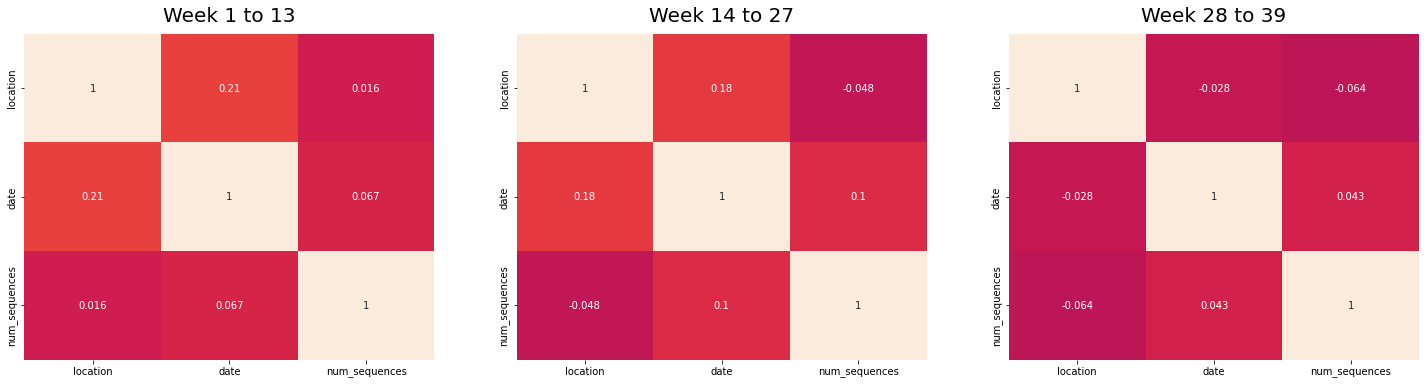

In [36]:
corr_world(world_data)

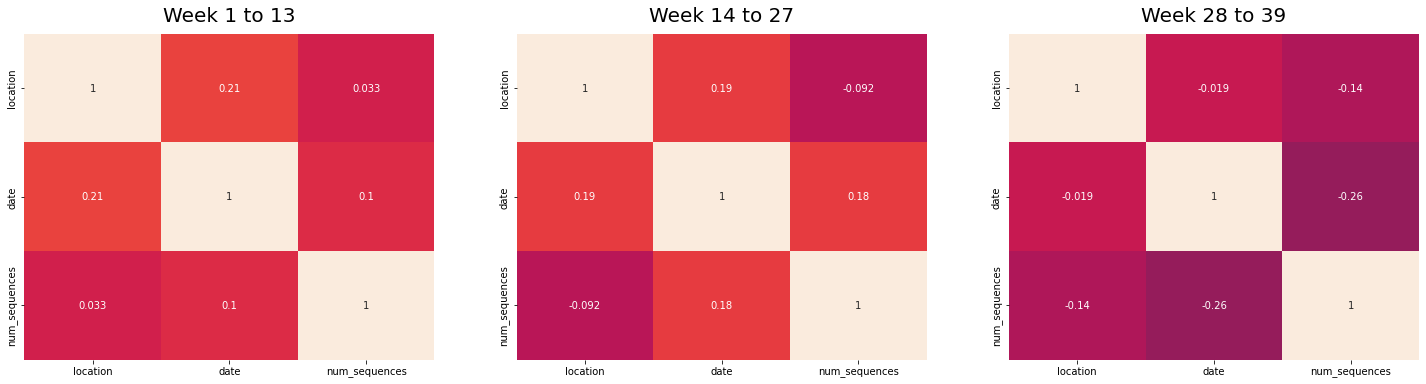

In [37]:
corr_world(world_data_alpha)

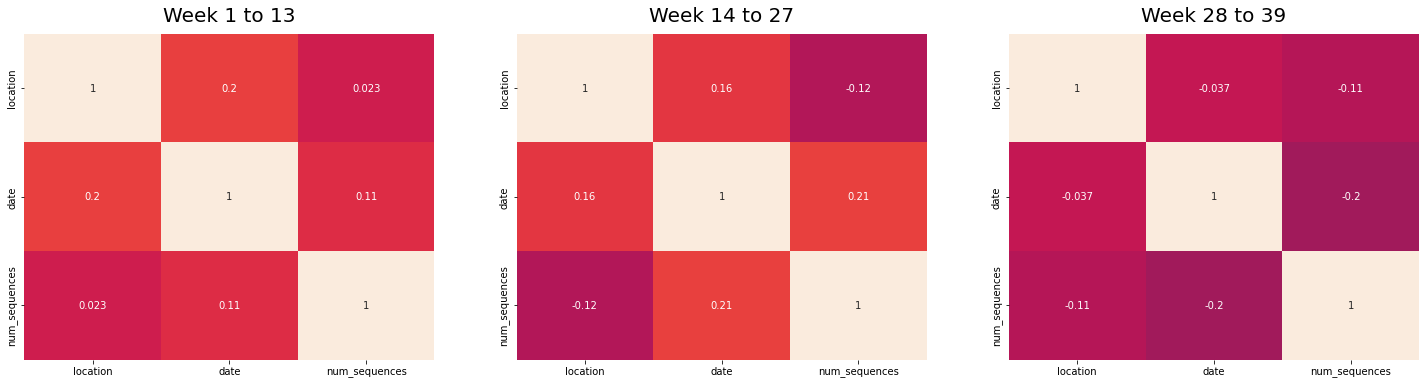

In [38]:
corr_world(world_data_beta)

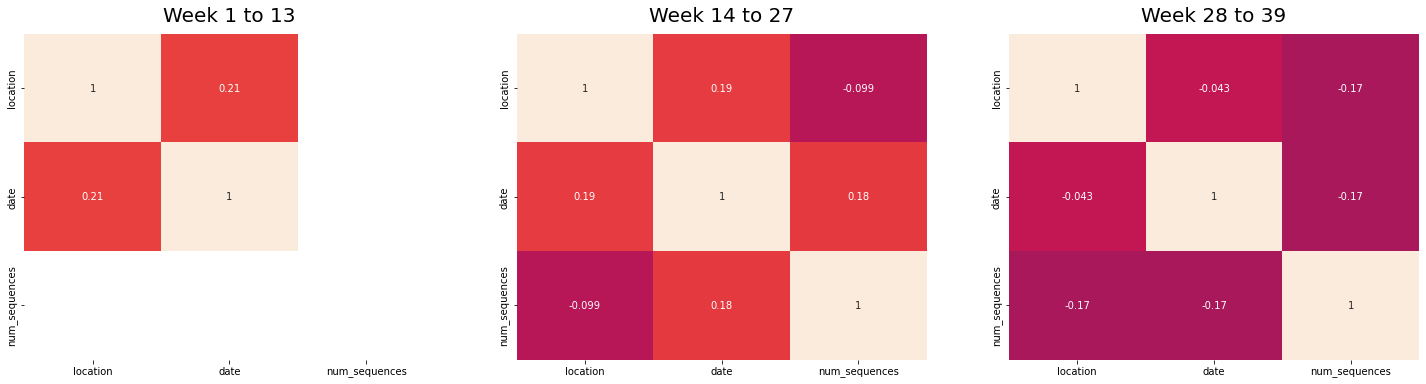

In [39]:
corr_world(world_data_gamma)

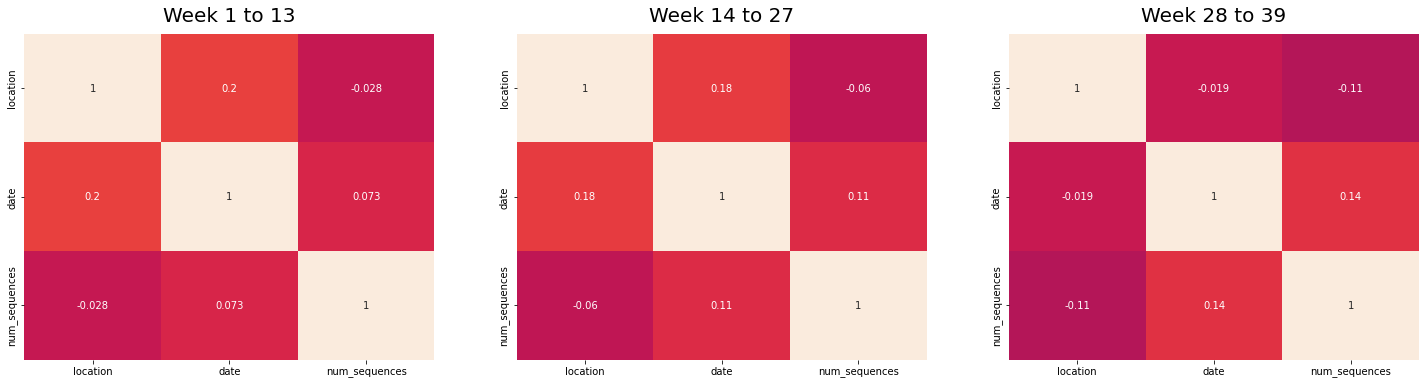

In [40]:
corr_world(world_data_delta)

#### Heatmap analysis
Observed that the pattern is simillar with Europe. During the outbreak location is have higher correlation coefficient compare to before and after the outbreak. While time have higher correlation coefficient before and after the outbreak (or during the begining and end of outbreak)   

Again, indicating a relation between time with number of cases before and after the outbreak. While the location(country) is related to number of cases during the outbreak. 

Further strengthening the fact that **the outbreak of each variant mostly happened at different location during the same period of time with the same pattern of spreading.**

Possible enrichment:

The infection rate in different countries seems messy. Consider how to dig the relation inside by correlation analysis. Is there any cluster of countries that behave similarly? Is the trend or pattern the same in all variants? If you have time, try to partition the time range into serval parts and then do correlation analysis on each part. Is there any change of pattern observed?